In [1]:
#importing basic libraries for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [4]:
import os
os.getcwd()
os.chdir("C:\\Users\\bwi01\\Downloads")
hotel = pd.read_csv("INNHotelsGroup.csv")

In [5]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

In [6]:
#display first 5 records of the data
data.head(5) 

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [7]:
#display the last 5 records of the data
data.tail(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [8]:
#the dataset has 36275 rows and 19 columns. Shape reveals the dimensions
data.shape

(36275, 19)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [10]:
data.duplicated().sum()

0

In [11]:
data = data.drop(["Booking_ID"], axis=1)

In [12]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [13]:
#Q1
data.describe().T
#The mean and median values of numbers of adults are both very close (value of 2)
#Lead time's 75% value is 126 while the max is 443. There will be outliers
#the average price of a room is around $103, over half of the guests are paying that or over.

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [14]:
#Q2
# Defining the hist_box() function
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, showmeans=True)
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

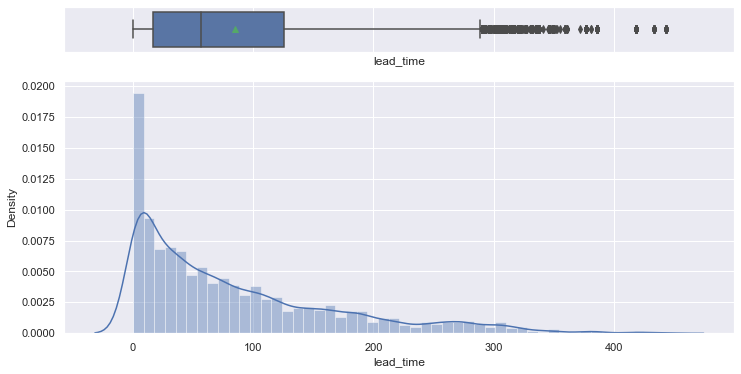

In [15]:
#2.1
hist_box(data, "lead_time")
#there has to be some outliers
#Skewed to the right
#for some reason, as lead time increases, cancellations increase. Lead time meaning the days in between
#your booking and arrival date

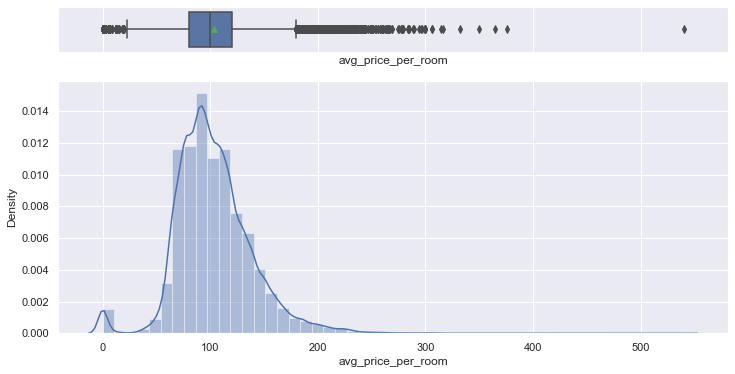

In [16]:
hist_box(data, "avg_price_per_room")
#This boxplot is skewed positivly, so the ability to make more money for the hotel is increased
#If they were to decrease the average price per room, they could make a better profit overtime
#Boxpolot has outliers

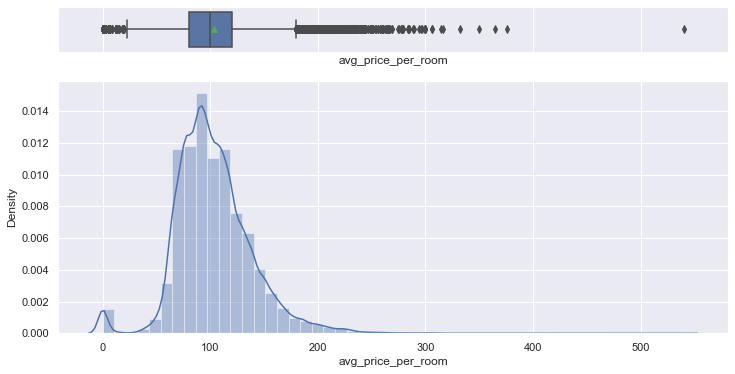

In [17]:
#2.2
hist_box(data, "avg_price_per_room")

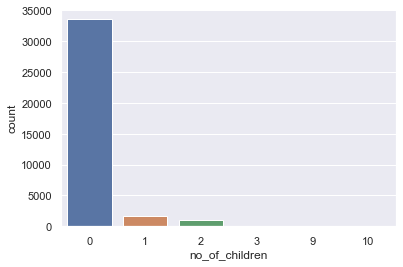

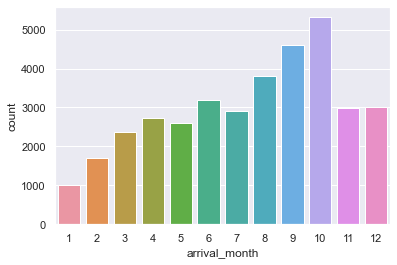

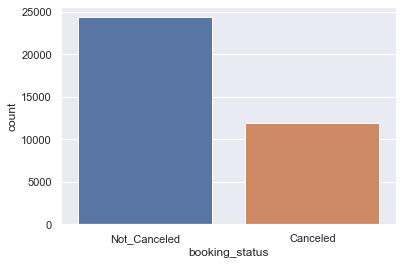

In [18]:
data[data["avg_price_per_room"] == 0]
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()


# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker


# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker


sns.countplot(data['no_of_children'])
plt.show()


data['no_of_children'].value_counts(normalize=True)


# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)


sns.countplot(data["arrival_month"])
plt.show()


data['arrival_month'].value_counts(normalize=True)


sns.countplot(data["booking_status"])
plt.show()


data['booking_status'].value_counts(normalize=True)


data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

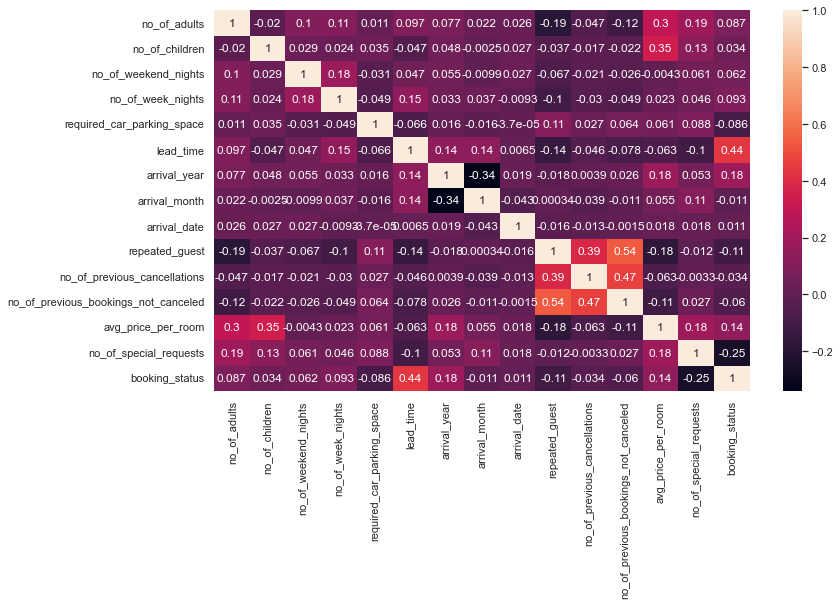

In [19]:
#Q3.1
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot = True)
plt.show()
#lead time and booking status correlate heavily
#the earlier people choose to book, the more cancellations tend to happen.

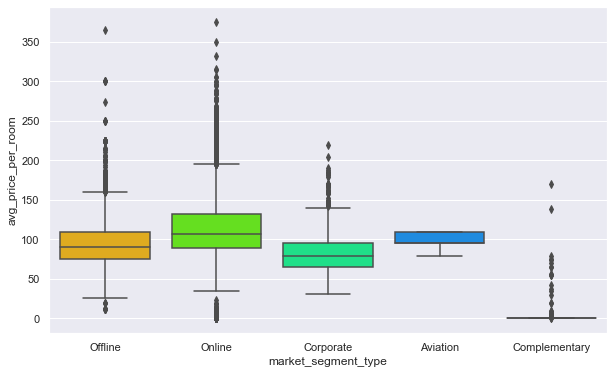

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow")
plt.show()
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel('Percentage Cancellations %')

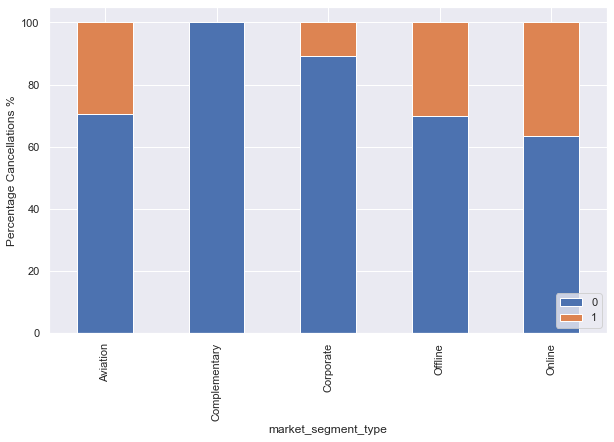

In [21]:
#3.2
stacked_barplot(data, "market_segment_type", "booking_status")
plt.show()
#booking offline seems to save consumers more money than online
#Complimentary is the most searched market segemnt with the least cancellations

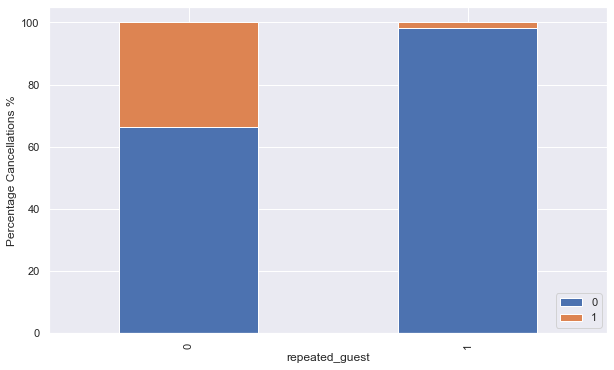

In [22]:
#3.3
stacked_barplot(data, "repeated_guest", "booking_status")
plt.show()
#A first time visitor is more liekly to stay and buy again so this hotel needs to sell to first timers more in order to
#keep their client list high

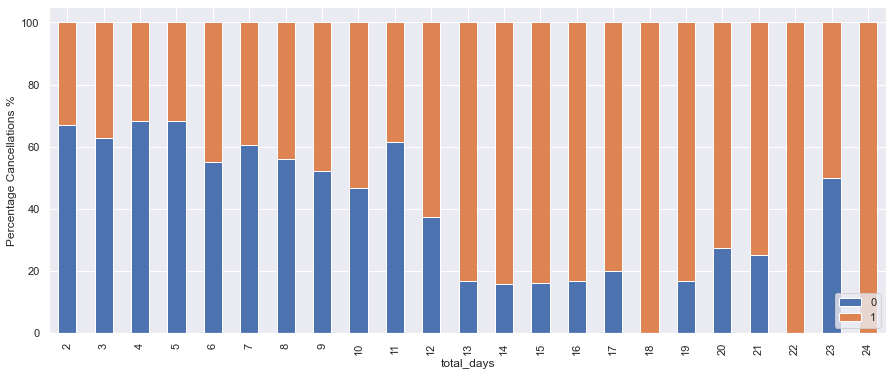

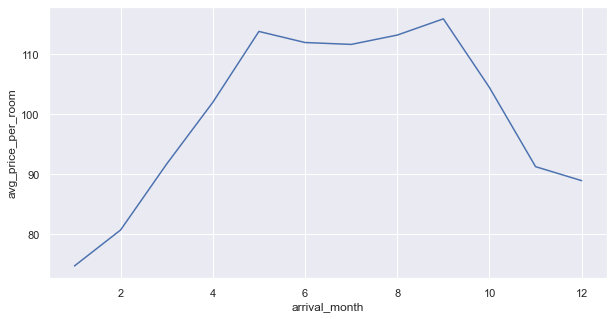

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


In [23]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

stacked_barplot(stay_data, "total_days", "booking_status",figsize=(15,6))


plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()


X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) # Encoding the Categorical features


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

#When a consumer decided to book a stay at the hotel for a larger amount of days,
#for some reason, they are more likely to cancel their stay all together. 
#The price of the room is lowest after christmas, in the months of January and Febuary

In [24]:
#3.4
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [25]:
#Q4 #Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.82      0.89      0.85     17073
           1       0.73      0.60      0.66      8319

    accuracy                           0.79     25392
   macro avg       0.77      0.74      0.76     25392
weighted avg       0.79      0.79      0.79     25392



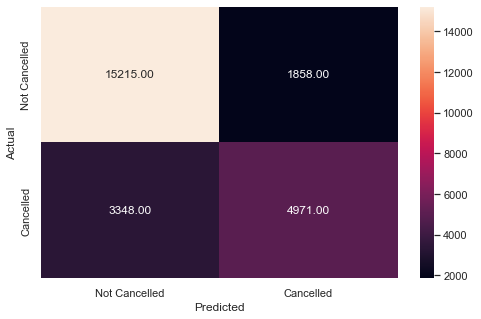

In [26]:
#Q4.2
#Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)
#This predictive model can be used by the hotel in order to sell to guests that want to buy with a recall score
#of 60%

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      7317
           1       0.72      0.59      0.65      3566

    accuracy                           0.79     10883
   macro avg       0.77      0.74      0.75     10883
weighted avg       0.79      0.79      0.78     10883



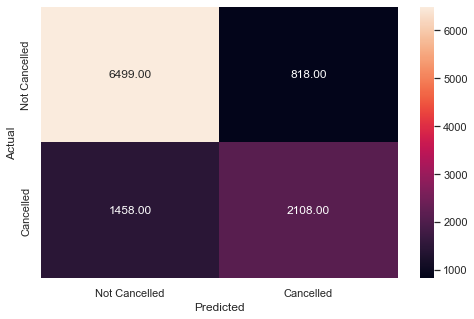

In [27]:
#Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)
#Using this model gives pretty average precision and recall scores as well
#need an optimum threshold for both precision and recall

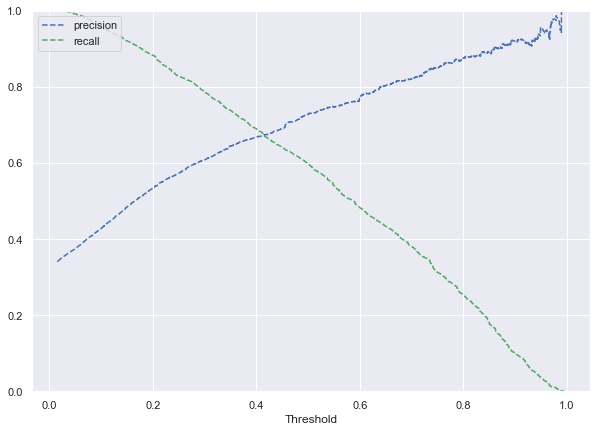

In [28]:
#Q4.3
#Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

#The threshold is at or around 4.2

In [29]:
#Setting the optimal threshold
optimal_threshold = .42

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     17073
           1       0.67      0.67      0.67      8319

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.78      0.79      0.79     25392



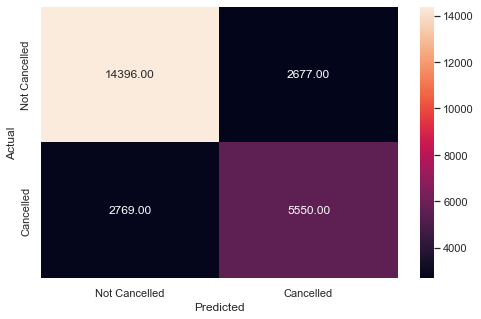

In [30]:
#4.4
#Creating confusion matrix
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)
#This threshold of .42 
#seemed to work perfectly as precision didnt drop but .5 points
#and now recall is in line with it

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7317
           1       0.67      0.66      0.67      3566

    accuracy                           0.78     10883
   macro avg       0.75      0.75      0.75     10883
weighted avg       0.78      0.78      0.78     10883



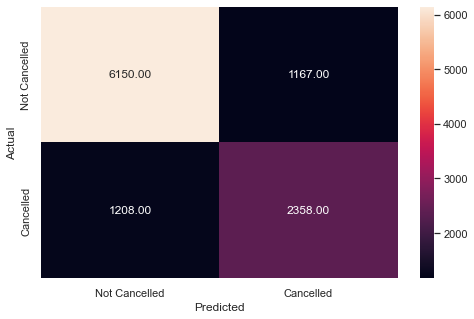

In [31]:
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)
#This is the confusion matrix

In [33]:
#Q5
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [34]:
#5.1
svm = SVC(kernel='linear',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X = X_train_scaled,y = y_train)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     17073
           1       0.74      0.61      0.67      8319

    accuracy                           0.80     25392
   macro avg       0.79      0.76      0.77     25392
weighted avg       0.80      0.80      0.80     25392



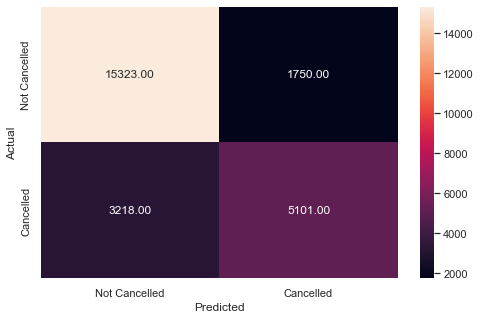

In [36]:
#5.2
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)
#Linear kernal is not overfitting
#Precision is at 83%

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7317
           1       0.74      0.61      0.67      3566

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883



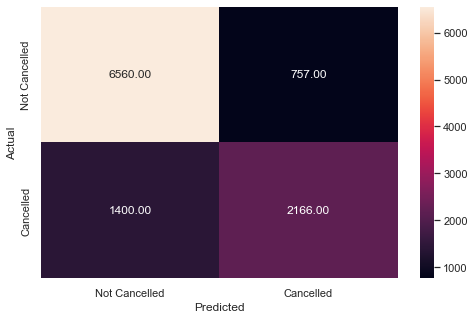

In [37]:
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)
#This model is less likely to predict cancelling guests due to the recall being at a lower 61%

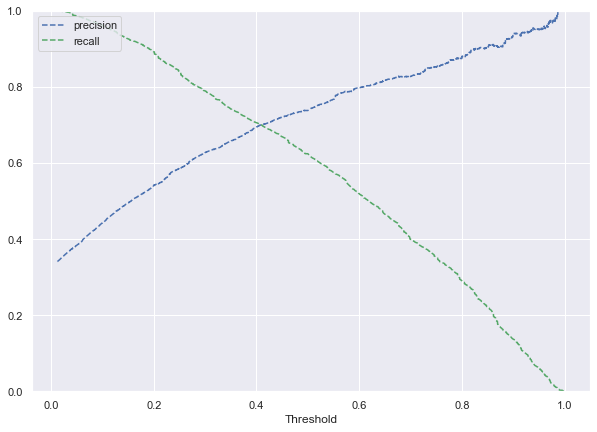

In [38]:
#5.3
#Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     17073
           1       0.67      0.68      0.68      8319

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



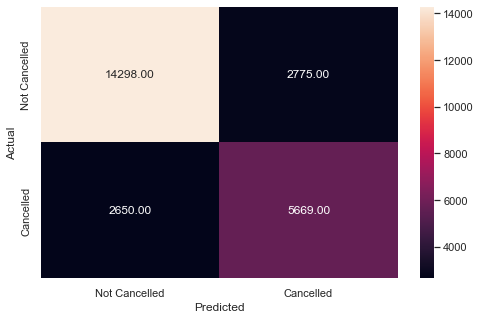

In [39]:
optimal_threshold_svm=4.1

y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold_svm)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7317
           1       0.69      0.70      0.70      3566

    accuracy                           0.80     10883
   macro avg       0.77      0.77      0.77     10883
weighted avg       0.80      0.80      0.80     10883



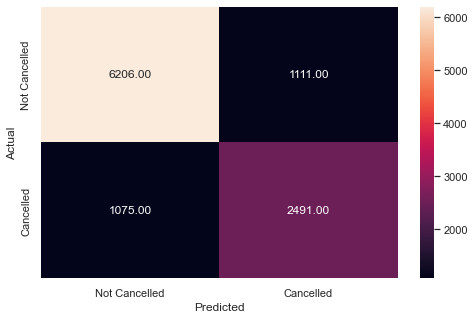

In [40]:
#5.4
y_pred_test = model.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

In [41]:
svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train_scaled,y_train)

SVC(probability=True)

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     17073
           1       0.79      0.65      0.71      8319

    accuracy                           0.83     25392
   macro avg       0.81      0.78      0.80     25392
weighted avg       0.82      0.83      0.82     25392



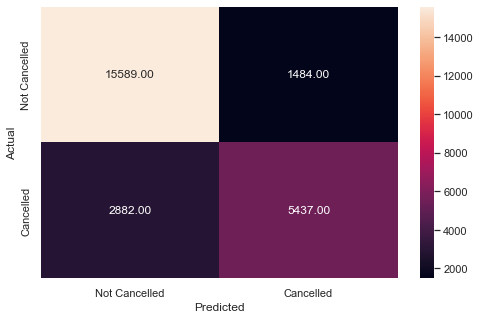

In [42]:
#5.5
y_pred_train_svm = svm_rbf.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7317
           1       0.74      0.61      0.67      3566

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883



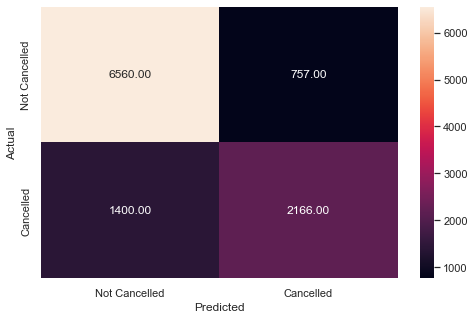

In [43]:
#5.6
y_pred_test = svm_rbf.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_svm)

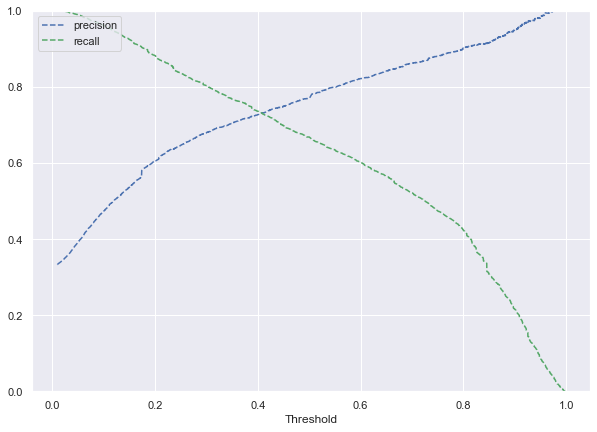

In [44]:
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [45]:
optimal_threshold_svm=.4

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     17073
           1       0.67      0.69      0.68      8319

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



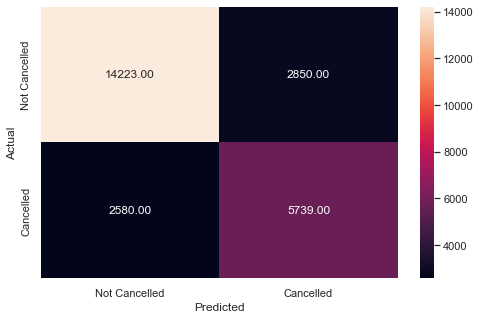

In [46]:
#5.7
y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold_svm)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7317
           1       0.72      0.73      0.72      3566

    accuracy                           0.82     10883
   macro avg       0.79      0.79      0.79     10883
weighted avg       0.82      0.82      0.82     10883



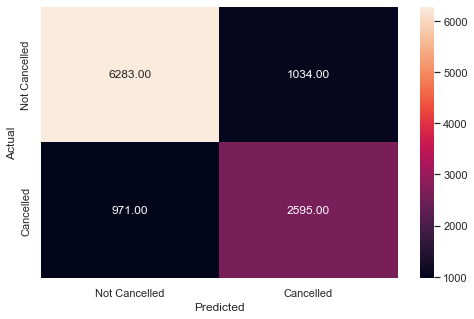

In [47]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

In [48]:
#Q6
model_dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17073
           1       0.98      1.00      0.99      8319

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



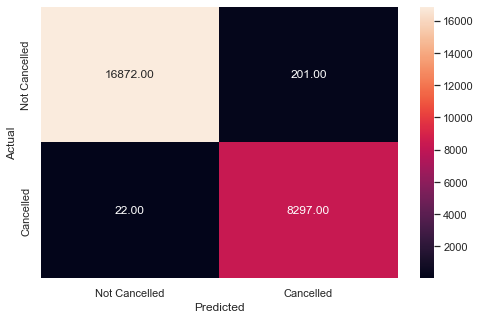

In [49]:
#6.2
#Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

In [50]:
#6.3
#Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

#Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


#Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

#Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

#Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     17073
           1       0.82      0.68      0.75      8319

    accuracy                           0.85     25392
   macro avg       0.84      0.81      0.82     25392
weighted avg       0.85      0.85      0.84     25392



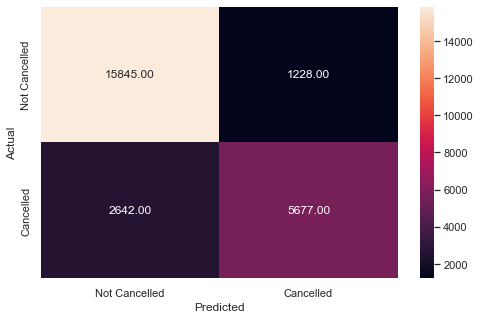

In [51]:
#6.4
#Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7317
           1       0.82      0.67      0.74      3566

    accuracy                           0.84     10883
   macro avg       0.84      0.80      0.81     10883
weighted avg       0.84      0.84      0.84     10883



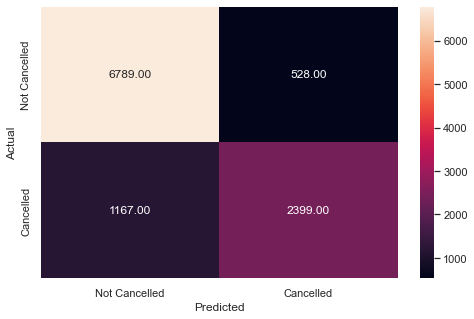

In [52]:
# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

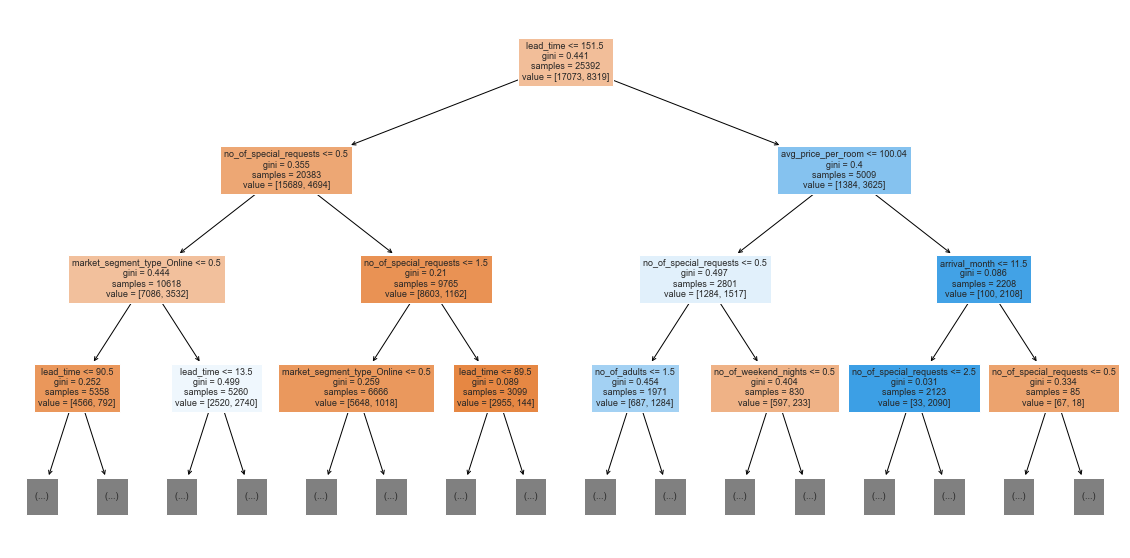

In [53]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

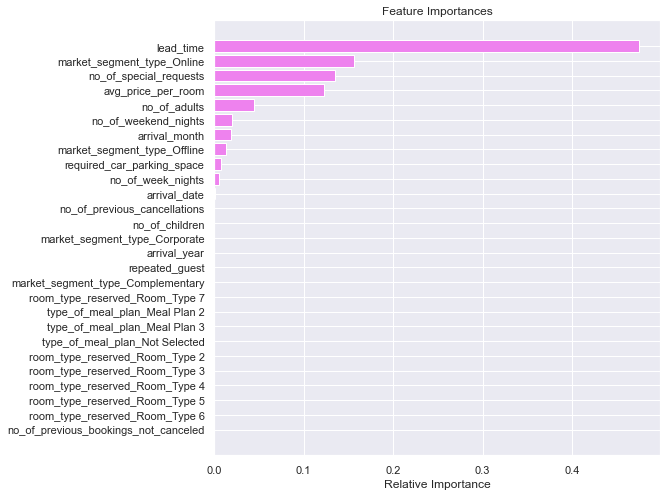

In [54]:
#6.5
#Importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#Lead time is the most important feature here, followed by the market segment, and then the number of special requests
#The market segment should be looked into more, more people book online these days, so profits should go towards
#boosting the online entity this hotel has
#Avg price per room and special requests need looking into more, this is because the more lead time there is, 
#the more cancellations there are. Meaning, if we can attract more guests through either lowering prices a bit,
#or giving out more special requests, there may be less cancellations.

In [55]:
#Q7
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17073
           1       0.98      1.00      0.99      8319

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



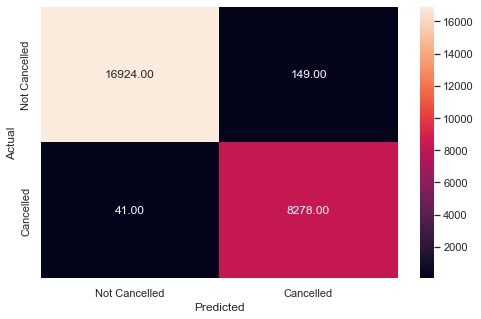

In [56]:
#7.2
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      7317
           1       0.88      0.80      0.84      3566

    accuracy                           0.90     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.90      0.90      0.90     10883



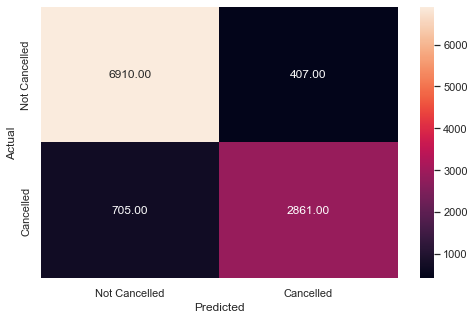

In [57]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

<AxesSubplot:xlabel='Importance'>

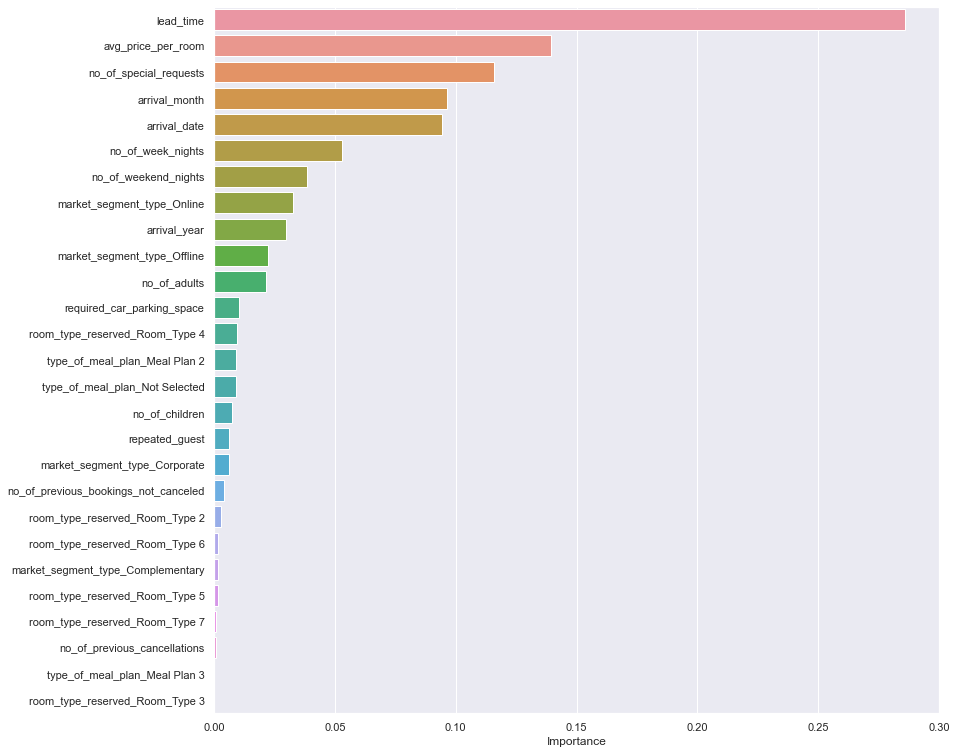

In [58]:
#7.3
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

#This graph is a lot more concise than the last. Here we can fully see that lead time, pricing, and special requests,
#are the 3 main reasons people are beginning to cancel. 

In [ ]:
#Q8 == 4 key takeaways

#Overall this hotel's business isnt doing bad, but if they are able to come to an agreement to do things such as ]
#lowering prices, or give more deals, they would have a better chance of seeing more business all year round.

#More guests are staying weeknights rather than weekends. This makes way for more events to be held on the weekends,
#such as parties or get togethers in order to attract more business on the weekends, that may lead to more business
#on the weekdays as well.

#I think repeating guests should be allowed to register for some kind of point system or multiple visit program,
#This kind of system would give a small deal to those that continue to come to the hotel, and the hotel will have
#the ability to retain its clientele basis more often.

#Assuming an adult starts at age of 18, there isnt a large number in attendence like their could be.
#If they were to revamp their social media influence to attract other crowds of guests as well,
#I think it could help the business a lot. 